In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
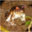

In [5]:
X_train[0]

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ...,
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ...,
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ...,
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ...,

       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ...,
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ...,
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ...,
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,  80]]], dtype=uint8)
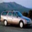

In [6]:
X_train[4]

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [11]:
classes[6]

'frog'

In [12]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

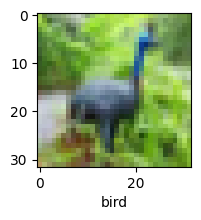

In [13]:
plot_sample(X_train,y_train,6)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

ann = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2732 - loss: 1.9902
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3879 - loss: 1.7247
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4162 - loss: 1.6421
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4421 - loss: 1.5665
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4574 - loss: 1.5308


In [16]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4653 - loss: 1.5332


[1.5359424352645874, 0.45989999175071716]

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element)for element in y_pred]

print("classification report:\n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
classification report:
               precision    recall  f1-score   support

           0       0.41      0.67      0.51      1000
           1       0.47      0.70      0.57      1000
           2       0.34      0.39      0.36      1000
           3       0.39      0.24      0.30      1000
           4       0.44      0.30      0.36      1000
           5       0.49      0.22      0.30      1000
           6       0.46      0.57      0.51      1000
           7       0.53      0.51      0.52      1000
           8       0.57      0.57      0.57      1000
           9       0.55      0.43      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



ANN doesnot work great on this dataset so we try CNN

In [18]:

cnn=Sequential([
    #cnn
    layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [20]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3873 - loss: 1.6883
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5996 - loss: 1.1433
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6585 - loss: 0.9796
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6886 - loss: 0.8915
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7139 - loss: 0.8217
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7344 - loss: 0.7698
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7581 - loss: 0.6983
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7726 - loss: 0.6567
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7843 - loss: 0.6169
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7975 - loss: 0.5765


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6977 - loss: 0.9305


[0.9399303793907166, 0.6944000124931335]

In [22]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [23]:
y_test=y_test.reshape(-1,)
y_test[:3]

array([3, 8, 8], dtype=uint8)

In [24]:
y_pred=cnn.predict(X_test)
y_pred[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[6.37516714e-05, 8.74481921e-04, 6.63286913e-03, 8.59464586e-01,
        1.48302506e-05, 8.92877057e-02, 1.64861940e-02, 3.62751052e-05,
        2.70960275e-02, 4.32013403e-05],
       [2.80444347e-03, 4.54747025e-03, 3.83159158e-06, 3.09727000e-08,
        1.62481712e-07, 1.16641651e-07, 6.89430202e-09, 2.54867044e-10,
        9.92641509e-01, 2.40293548e-06],
       [4.89170328e-02, 2.91929364e-01, 2.15194048e-03, 1.09923980e-03,
        6.95608440e-04, 5.21162816e-04, 1.21488774e-04, 4.92705476e-05,
        6.43544436e-01, 1.09704752e-02]], dtype=float32)

In [25]:
np.argmax(y_pred[0])

np.int64(3)

In [29]:
y_classes=[np.argmax(element)for element in y_pred]


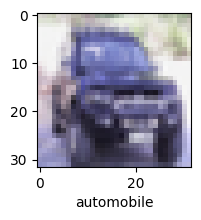

In [32]:
plot_sample(X_test,y_test,9)

In [33]:
classes[y_classes[9]]

'automobile'

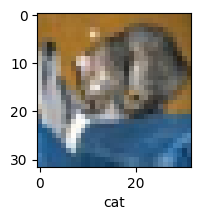

In [34]:
plot_sample(X_test,y_test,0)

In [35]:
classes[y_classes[0]]

'cat'

In [36]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1000
           1       0.80      0.83      0.81      1000
           2       0.60      0.60      0.60      1000
           3       0.49      0.51      0.50      1000
           4       0.75      0.53      0.62      1000
           5       0.59      0.61      0.60      1000
           6       0.76      0.76      0.76      1000
           7       0.75      0.72      0.74      1000
           8       0.76      0.83      0.79      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

